In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: d:\KAIM\weak-11\Bayesian-Change-Point-Analysis-of-Brent-Oil-Prices


In [2]:
from scripts.data_loader import load_price_data
from scripts.preprocessing import prepare_monthly_returns
from scripts.eda import plot_price_trend, plot_volatility

df = load_price_data("../data/raw/BrentOilPrices.csv")
df_m = prepare_monthly_returns(df)


d:\KAIM\weak-11\Bayesian-Change-Point-Analysis-of-Brent-Oil-Prices\scripts\data_loader.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


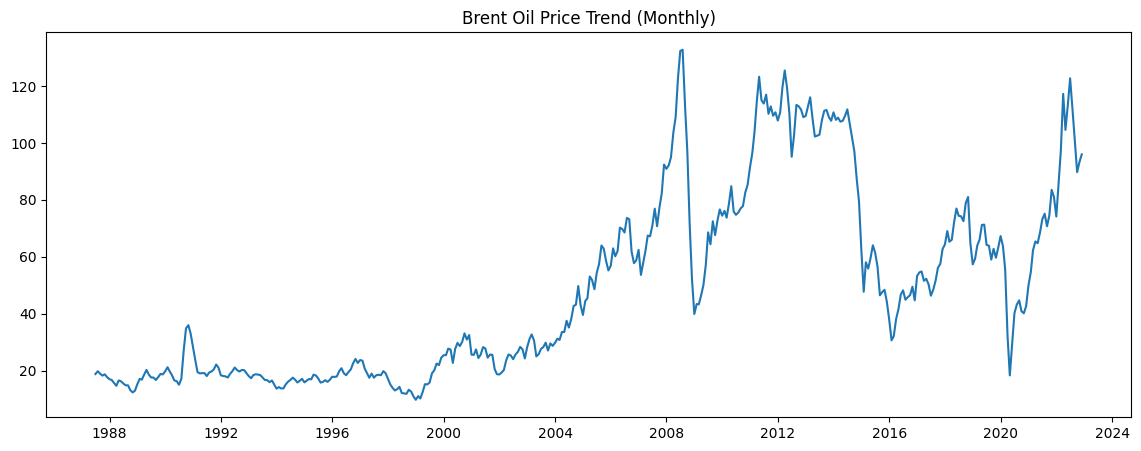

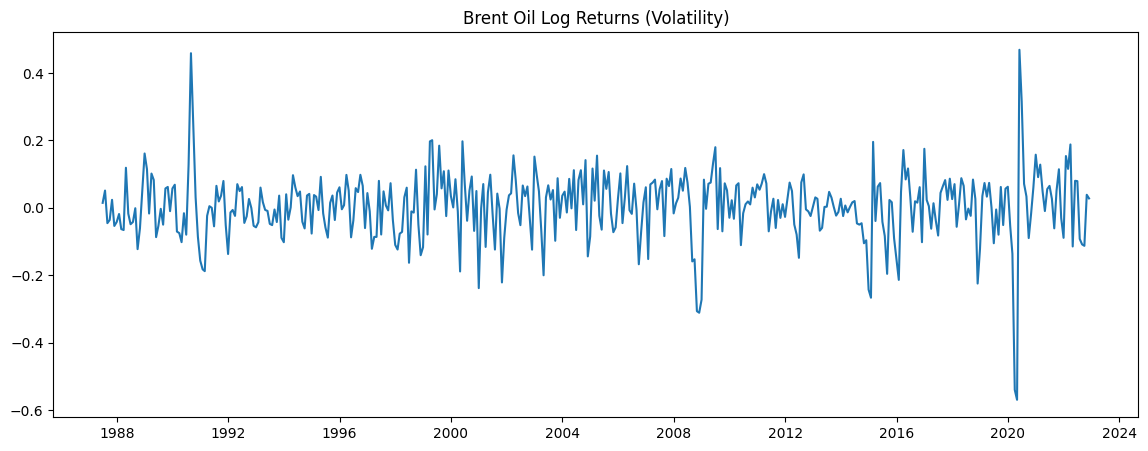

In [3]:
plot_price_trend(df_m)
plot_volatility(df_m)


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_m["log_return"])
print("ADF statistic:", result[0])
print("p-value:", result[1])


ADF statistic: -11.480085058062683
p-value: 5.019287404474601e-21


The ADF test rejects the null hypothesis of a unit root, confirming that log returns are stationary and suitable for modeling.

In [ ]:
from scripts.change_point_model import build_change_point_model
import pymc as pm

returns = df_m["log_return"].values
model = build_change_point_model(returns)

with model:
    trace = pm.sample(1000, tune=1000, chains=1, cores=1, return_inferencedata=True)


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma]


d:\KAIM\weak-11\Bayesian-Change-Point-Analysis-of-Brent-Oil-Prices\venv\Lib\site-packages\rich\live.py:260: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
import arviz as az
az.summary(trace)
az.plot_trace(trace)
az.plot_posterior(trace, var_names=["tau"])
